<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/DATASET-Tr%C3%A8s-Large/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-645b901addb4>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = label_encoder.fit_transform(data[col])
<ipython-input-1-645b901addb4>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = label_encoder.fit_transform(data[col])
<ipython-input-1-645b901addb4>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are 

Moyenne de l'AUC sur les ensembles d'entraînement : 0.8173495474187806


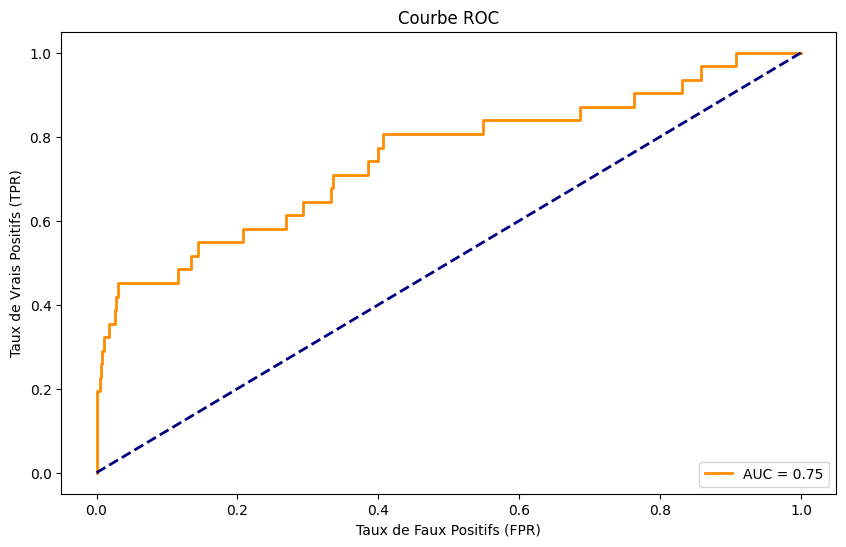

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Copie des données pour éviter les avertissements SettingWithCopyWarning
data = data.copy()

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Utilisation de .loc pour éviter les avertissements SettingWithCopyWarning
data = data.loc[:, selected_columns]

# Suppression des lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']

# Utilisation de .loc pour éviter les avertissements SettingWithCopyWarning
for col in categorical_columns:
    data.loc[:, col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
# Prépare mes données pour l'entraînement d'un modèle
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données permet de d'assurer que chaque caractéristiques contribuent de manière équitable au modèle.
# Normaliser des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modèle de régression Ridge
alpha = 1.0  # Vous pouvez ajuster cette valeur en fonction de votre besoin
model = Ridge(alpha=alpha)

# Validation croisée
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f'Moyenne de l\'AUC sur les ensembles d\'entraînement : {cross_val_scores.mean()}')

# Entraînement du modèle sur l'ensemble d'entraînement mis à l'échelle
model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Affichage de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()
